In [1]:
import torch
from torch import autocast
from diffusers import StableDiffusionPipeline

/mnt/disks/disk_main/anaconda3/envs/tune_a_video/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
pipe = StableDiffusionPipeline.from_pretrained(
    '../checkpoints/dedede',
    torch_dtype=torch.float16
).to('cuda')

In [3]:
pipe.safety_checker = None

100%|██████████| 50/50 [00:12<00:00,  3.98it/s]


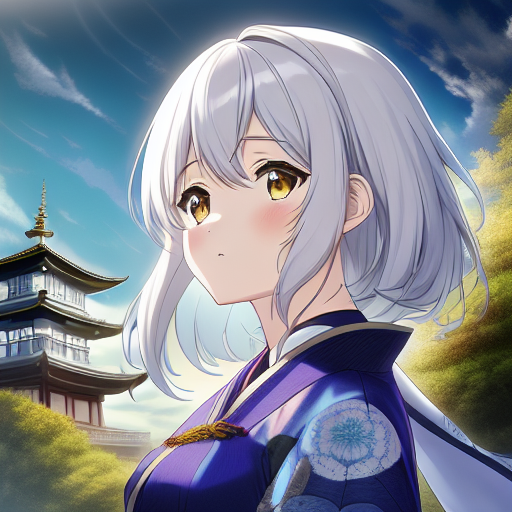

In [7]:
prompt = "masterpiece, beautiful anime white hair girl, kyoto animation"
neg = "bad quality, low quality"
with autocast("cuda"):
    image = pipe(prompt,negative_prompt=neg, guidance_scale=7.5).images[0]  
image